In [1]:
import pandas as pd

In [78]:
gdf = pd.read_csv('data/Guardian Populism data.csv')

In [79]:
cdf = pd.read_csv('data/Combined Populism data.csv', encoding='latin-1')

In [21]:
jdf = pd.read_csv('data/JOP - Combined Populism data.csv', encoding='latin-1')
jdf.head()

,QID,AGE,IDEO3,EDUC,INCOME,RELIG,PID7,MALE,WHITE,RACE,...,badelite_n,goodpeople_n,badactor,badelite,goodpeople,populism,STUDY,TEXT,TREATMENT,IDEO
0,R_006siEFaAZgOBNz,35-44,Moderate,College graduate,"Between $100,000 and $149,999",None/Not Religious,Independent,female,White,White,...,NaN,NaN,NaN,NaN,NaN,0,March2016,,0.0,NaN
1,R_00Oelnrg2pBKbNr,18-24,Liberal,Some college,"Under $15,000",Atheist,Strong Democrat,female,White,White,...,1.0,0.0,1.0,1.0,0.0,0,March2016,businessmen Businessmen care about the economy...,1.0,NaN
2,R_01UYcK9kRaI7x1r,65+,Conservative,Graduate degree,"Between $100,000 and $149,999",Jewish,Independent,male,White,White,...,1.0,0.0,1.0,1.0,1.0,1,March2016,weakness of our president - he invited it firs...,0.0,NaN
3,R_02G5dWQ3ydwPJNb,45-54,Liberal,High School/GED,"Between $50,000 and $74,999",Other,Independent leaning Republican,male,White,White,...,0.0,0.0,1.0,0.0,0.0,0,March2016,Isis Terrism can not be tolerated in any count...,1.0,NaN
4,R_02kdZfIPePAY8y9,18-24,Liberal,High School/GED,"$200,000 or more",Other,Other,female,White,White,...,1.0,0.0,1.0,1.0,0.5,1,March2016,"White people, cishet people, abled people, etc...",1.0,NaN


In [22]:
jdf.columns

Index(['QID', 'AGE', 'IDEO3', 'EDUC', 'INCOME', 'RELIG', 'PID7', 'MALE',
       'WHITE', 'RACE', 'PID3', 'badactor_r', 'badelite_r', 'goodpeople_r',
       'badactor_n', 'badelite_n', 'goodpeople_n', 'badactor', 'badelite',
       'goodpeople', 'populism', 'STUDY', 'TEXT', 'TREATMENT', 'IDEO'],
      dtype='object')

In [25]:
(jdf['goodpeople_n'] == jdf['goodpeople_r']).mean()

0.9039812646370023

In [ ]:
df = pd.read_csv("data/JOP - Combined Populism data.csv", encoding="latin-1")


In [ ]:

jdf = jdf["QID badelite goodpeople TEXT populism".split()]
jdf = jdf.dropna()

# Results

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn

# Results 5-5

In [77]:
rdf = pd.read_pickle('data/combined_populism_results5-5.pkl')

In [79]:
rdf.columns

Index(['QID', 'AGE', 'IDEO3', 'EDUC', 'INCOME', 'RELIG', 'PID7', 'MALE',
       'WHITE', 'RACE', 'PID3', 'badactor_r', 'badelite_r', 'goodpeople_r',
       'badactor_n', 'badelite_n', 'goodpeople_n', 'badactor', 'badelite',
       'goodpeople', 'populism', 'STUDY', 'TEXT', 'TREATMENT', 'IDEO',
       'guess_badelite_gpt3', 'guess_badelite1_gpt3', 'guess_badelite2_gpt3',
       'guess_goodpeople_gpt3', 'guess_goodpeople1_gpt3',
       'guess_goodpeople2_gpt3', 'guess_goodpeople3_gpt3',
       'guess_goodpeople4_gpt3', 'guess_badelite_gpt3_criteria',
       'guess_goodpeople_gpt3_criteria', 'guess_populism_gpt3_criteria',
       'guess_populism_gpt3', 'gpt3populismaccuracycriteria',
       'gpt3populismaccuracy'],
      dtype='object')

# Using 6 sub-classifiers

In [80]:
rdf.gpt3populismaccuracycriteria.mean()

0.6900763358778625

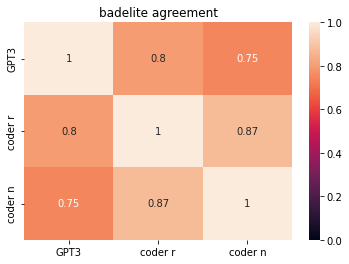

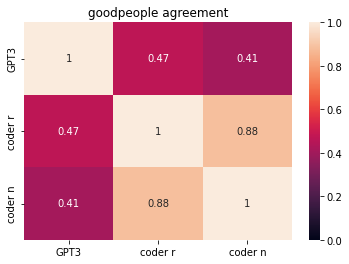

In [87]:
#Calculate the agreement between 'guess_badelite_gpt3_criteria', 'badelite_r', and 'badelite_n'
agreement = np.zeros((3,3))
agreement[0,0] = 1 #GPT3
agreement[1,1] = 1 #coder r
agreement[2,2] = 1 #coder n
agreement[0,1] = agreement[1,0] = (rdf.guess_badelite_gpt3_criteria == rdf.badelite_r).mean()
agreement[0,2] = agreement[2,0] = (rdf.guess_badelite_gpt3_criteria == rdf.badelite_n).mean()
agreement[1,2] = agreement[2,1] = (rdf.badelite_n == rdf.badelite_r).mean()
seaborn.heatmap(agreement, vmin=0, vmax=1, annot=True, xticklabels=['GPT3', 'coder r', 'coder n'], yticklabels=['GPT3', 'coder r', 'coder n'])
plt.title('badelite agreement')
plt.show()
agreement[0,1] = agreement[1,0] = (rdf.guess_goodpeople_gpt3_criteria == rdf.goodpeople_r).mean()
agreement[0,2] = agreement[2,0] = (rdf.guess_goodpeople_gpt3_criteria == rdf.goodpeople_n).mean()
agreement[1,2] = agreement[2,1] = (rdf.goodpeople_r == rdf.goodpeople_n).mean()
seaborn.heatmap(agreement, vmin=0, vmax=1, annot=True, xticklabels=['GPT3', 'coder r', 'coder n'], yticklabels=['GPT3', 'coder r', 'coder n'])
plt.title('goodpeople agreement')
plt.show()

# Bucket classifiers

In [ ]:
rdf.gpt3populismaccuracy.mean()

0.7519083969465649

In [ ]:
rdf.gpt3goodpeopleaccuracycorrected.mean()

0.667175572519084

In [ ]:
rdf.gpt3populismaccuracy.mean()

0.767175572519084

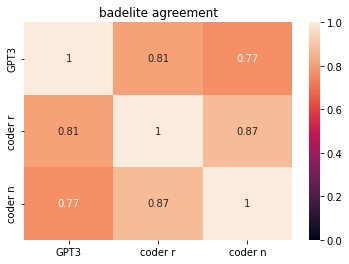

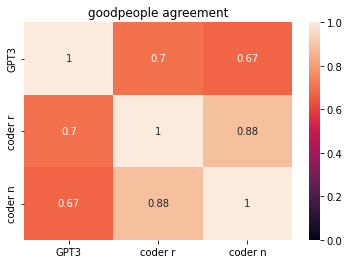

In [88]:
agreement[0,1] = agreement[1,0] = (rdf.guess_badelite_gpt3 == rdf.badelite_r).mean()
agreement[0,2] = agreement[2,0] = (rdf.guess_badelite_gpt3 == rdf.badelite_n).mean()
agreement[1,2] = agreement[2,1] = (rdf.badelite_n == rdf.badelite_r).mean()
seaborn.heatmap(agreement, vmin=0, vmax=1, annot=True, xticklabels=['GPT3', 'coder r', 'coder n'], yticklabels=['GPT3', 'coder r', 'coder n'])
plt.title('badelite agreement')
plt.show()
agreement[0,1] = agreement[1,0] = (rdf.guess_goodpeople_gpt3 == rdf.goodpeople_r).mean()
agreement[0,2] = agreement[2,0] = (rdf.guess_goodpeople_gpt3 == rdf.goodpeople_n).mean()
agreement[1,2] = agreement[2,1] = (rdf.goodpeople_r == rdf.goodpeople_n).mean()
seaborn.heatmap(agreement, vmin=0, vmax=1, annot=True, xticklabels=['GPT3', 'coder r', 'coder n'], yticklabels=['GPT3', 'coder r', 'coder n'])
plt.title('goodpeople agreement')
plt.show()


# Results 5-12

In [93]:
rdf = pd.read_pickle('data/combined_populism_results.pkl')

In [94]:
rdf.columns

Index(['QID', 'AGE', 'IDEO3', 'EDUC', 'INCOME', 'RELIG', 'PID7', 'MALE',
       'WHITE', 'RACE', 'PID3', 'badactor_r', 'badelite_r', 'goodpeople_r',
       'badactor_n', 'badelite_n', 'goodpeople_n', 'badactor', 'badelite',
       'goodpeople', 'populism', 'STUDY', 'TEXT', 'TREATMENT', 'IDEO',
       'goodpeoplecorrected', 'guess_badelite_gpt3', 'guess_badelite1_gpt3',
       'guess_badelite2_gpt3', 'guess_goodpeople_gpt3',
       'guess_goodpeople1_gpt3', 'guess_goodpeople2_gpt3',
       'guess_goodpeople3_gpt3', 'guess_goodpeople4_gpt3',
       'guess_badelite_gpt3_criteria', 'guess_goodpeople_gpt3_criteria',
       'guess_populism_gpt3_criteria', 'gpt3goodpeopleaccuracycriteria',
       'gpt3goodpeopleaccuracycriteriacorrected',
       'gpt3badelitecriteriaaccuracy', 'gpt3populismaccuracycriteria',
       'guess_populism_gpt3', 'gpt3goodpeopleaccuracy',
       'gpt3goodpeopleaccuracycorrected', 'gpt3badeliteaccuracy',
       'gpt3populismaccuracy'],
      dtype='object')

# Using 6 sub-classifiers

In [95]:
rdf.gpt3goodpeopleaccuracycriteria.mean()

0.5244274809160305

In [96]:

rdf.gpt3goodpeopleaccuracycriteriacorrected.mean()

0.40076335877862596

In [71]:
rdf.gpt3badelitecriteriaaccuracy.mean()

0.7305343511450382

In [72]:
rdf.gpt3populismaccuracycriteria.mean()

0.6900763358778625

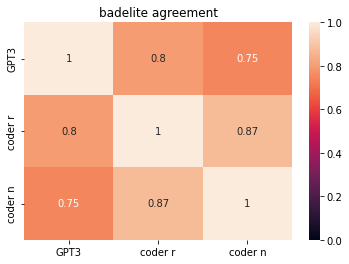

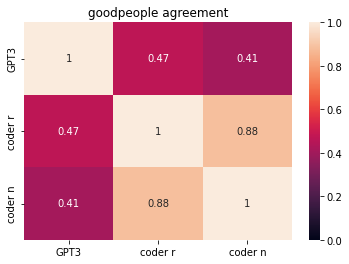

In [97]:
#Calculate the agreement between 'guess_badelite_gpt3_criteria', 'badelite_r', and 'badelite_n'
agreement = np.zeros((3,3))
agreement[0,0] = 1 #GPT3
agreement[1,1] = 1 #coder r
agreement[2,2] = 1 #coder n
agreement[0,1] = agreement[1,0] = (rdf.guess_badelite_gpt3_criteria == rdf.badelite_r).mean()
agreement[0,2] = agreement[2,0] = (rdf.guess_badelite_gpt3_criteria == rdf.badelite_n).mean()
agreement[1,2] = agreement[2,1] = (rdf.badelite_n == rdf.badelite_r).mean()
seaborn.heatmap(agreement, vmin=0, vmax=1, annot=True, xticklabels=['GPT3', 'coder r', 'coder n'], yticklabels=['GPT3', 'coder r', 'coder n'])
plt.title('badelite agreement')
plt.show()
agreement[0,1] = agreement[1,0] = (rdf.guess_goodpeople_gpt3_criteria == rdf.goodpeople_r).mean()
agreement[0,2] = agreement[2,0] = (rdf.guess_goodpeople_gpt3_criteria == rdf.goodpeople_n).mean()
agreement[1,2] = agreement[2,1] = (rdf.goodpeople_r == rdf.goodpeople_n).mean()
seaborn.heatmap(agreement, vmin=0, vmax=1, annot=True, xticklabels=['GPT3', 'coder r', 'coder n'], yticklabels=['GPT3', 'coder r', 'coder n'])
plt.title('goodpeople agreement')
plt.show()


# Bucket classifiers

In [74]:

rdf.gpt3goodpeopleaccuracy.mean()


0.6068702290076335

In [75]:
rdf.gpt3goodpeopleaccuracycorrected.mean()

0.667175572519084

In [76]:
rdf.gpt3populismaccuracy.mean()

0.767175572519084

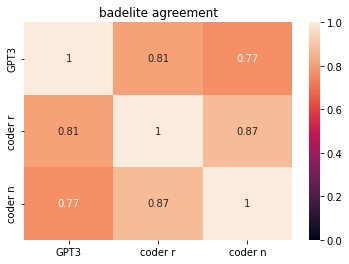

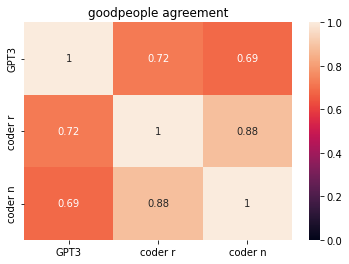

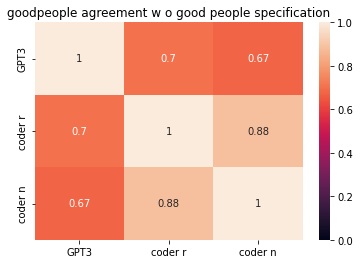

0.6519083969465649
0.667175572519084


In [102]:
agreement[0,1] = agreement[1,0] = (rdf.guess_badelite_gpt3 == rdf.badelite_r).mean()
agreement[0,2] = agreement[2,0] = (rdf.guess_badelite_gpt3 == rdf.badelite_n).mean()
agreement[1,2] = agreement[2,1] = (rdf.badelite_n == rdf.badelite_r).mean()
seaborn.heatmap(agreement, vmin=0, vmax=1, annot=True, xticklabels=['GPT3', 'coder r', 'coder n'], yticklabels=['GPT3', 'coder r', 'coder n'])
plt.title('badelite agreement')
plt.show()
agreement[0,1] = agreement[1,0] = (rdf.guess_goodpeople_gpt3 == rdf.goodpeople_r).mean()
agreement[0,2] = agreement[2,0] = (rdf.guess_goodpeople_gpt3 == rdf.goodpeople_n).mean()
agreement[1,2] = agreement[2,1] = (rdf.goodpeople_r == rdf.goodpeople_n).mean()
seaborn.heatmap(agreement, vmin=0, vmax=1, annot=True, xticklabels=['GPT3', 'coder r', 'coder n'], yticklabels=['GPT3', 'coder r', 'coder n'])
plt.title('goodpeople agreement')
plt.show()

oldrdf = pd.read_pickle('data/combined_populism_results5-5.pkl')
agreement[0,1] = agreement[1,0] = (oldrdf.guess_goodpeople_gpt3 == oldrdf.goodpeople_r).mean()
agreement[0,2] = agreement[2,0] = (oldrdf.guess_goodpeople_gpt3 == oldrdf.goodpeople_n).mean()
agreement[1,2] = agreement[2,1] = (oldrdf.goodpeople_r == oldrdf.goodpeople_n).mean()
seaborn.heatmap(agreement, vmin=0, vmax=1, annot=True, xticklabels=['GPT3', 'coder r', 'coder n'], yticklabels=['GPT3', 'coder r', 'coder n'])
plt.title('goodpeople agreement w o good people specification')
plt.show()

print((oldrdf.guess_goodpeople_gpt3 == rdf.goodpeoplecorrected).mean())
print((rdf.guess_goodpeople_gpt3 == rdf.goodpeoplecorrected).mean())

Histograms of probabilities for codes

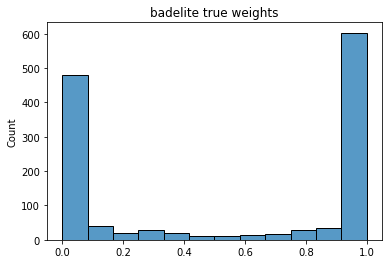

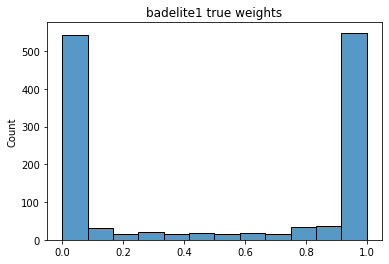

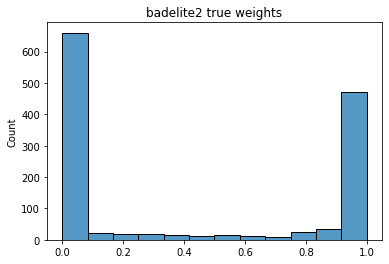

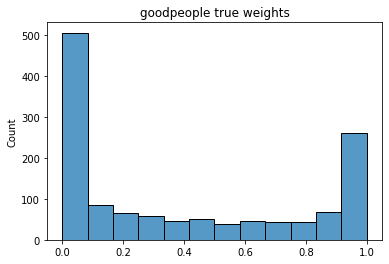

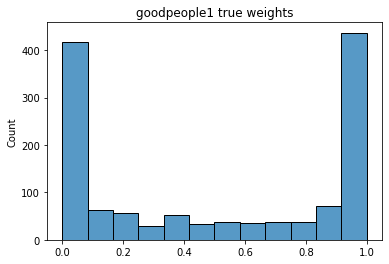

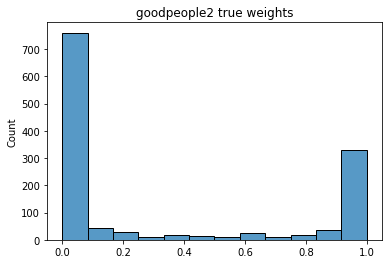

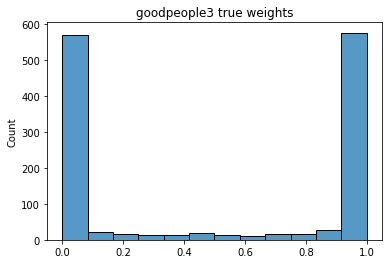

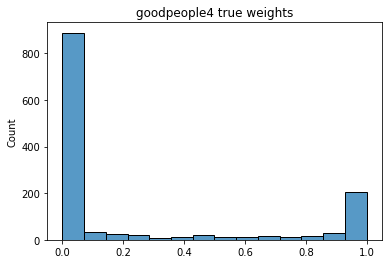

In [104]:
criteria = "badelite badelite1 badelite2 goodpeople goodpeople1 goodpeople2 goodpeople3 goodpeople4".split()
for criterion in criteria:
    path = f"data/{criterion}/ds_exp_results_text-davinci-002_2022-05-05_processed.pkl"
    cdf = pd.read_pickle(path)
    weight_true = []
    for i, row in cdf.iterrows():
        weight_true.append(row.probs['true'])
    seaborn.histplot(weight_true)
    plt.title(f"{criterion} true weights")
    plt.show()

In [6]:
jdf.head()

,QID,AGE,IDEO3,EDUC,INCOME,RELIG,PID7,MALE,WHITE,RACE,...,badelite_n,goodpeople_n,badactor,badelite,goodpeople,populism,STUDY,TEXT,TREATMENT,IDEO
0,R_006siEFaAZgOBNz,35-44,Moderate,College graduate,"Between $100,000 and $149,999",None/Not Religious,Independent,female,White,White,...,NaN,NaN,NaN,NaN,NaN,0,March2016,,0.0,NaN
1,R_00Oelnrg2pBKbNr,18-24,Liberal,Some college,"Under $15,000",Atheist,Strong Democrat,female,White,White,...,1.0,0.0,1.0,1.0,0.0,0,March2016,businessmen Businessmen care about the economy...,1.0,NaN
2,R_01UYcK9kRaI7x1r,65+,Conservative,Graduate degree,"Between $100,000 and $149,999",Jewish,Independent,male,White,White,...,1.0,0.0,1.0,1.0,1.0,1,March2016,weakness of our president - he invited it firs...,0.0,NaN
3,R_02G5dWQ3ydwPJNb,45-54,Liberal,High School/GED,"Between $50,000 and $74,999",Other,Independent leaning Republican,male,White,White,...,0.0,0.0,1.0,0.0,0.0,0,March2016,Isis Terrism can not be tolerated in any count...,1.0,NaN
4,R_02kdZfIPePAY8y9,18-24,Liberal,High School/GED,"$200,000 or more",Other,Other,female,White,White,...,1.0,0.0,1.0,1.0,0.5,1,March2016,"White people, cishet people, abled people, etc...",1.0,NaN


In [7]:
for i, row in jdf.iterrows():
    print(row['text'], row['goodpeople'] )
    input()

  nan
businessmen Businessmen care about the economy and not much else.  Economic decisions should take into account inequalities in addition to financial growth. 0.0
weakness of our president - he invited it first he drew a red line for Syria and did nothing when they crossed it.\\then he called ISIS a JV team and still refuses to identify radical islamic terrorists as what they are 1.0
Isis Terrism can not be tolerated in any country. Action should be taken to prevent this. 0.0
White people, cishet people, abled people, etc The ruling class in general needs to listen to oppressed classes about how to treat them, include them, etc. Everyone needs to be more open-minded and considerate of other people, and ask more "how can I help others?" when it comes to helping the cause of the oppressed. 0.5
Whites Slavery selln blacks to the whites lake of pay no privice 0.0
aclo,freedom foundation any organization that hates GOD you can't hate GOD and still believe that any good in the world can 

KeyboardInterrupt: Interrupted by user

In [104]:
df = pd.read_pickle('data/badeliterationale/ds.pkl')
df.head().to_pickle('data/badeliterationalemini/ds.pkl')

In [113]:
pd.read_pickle('data/badelite/ds.pkl')
from lmtools.cost_estimator import cost_approximation as ca


In [118]:
ca(pd.read_pickle('data/goodpeoplerationale/ds.pkl'), 'davinci')

Token indices sequence length is longer than the specified maximum sequence length for this model (1200 > 1024). Running this sequence through the model will result in indexing errors


Total number of tokens: 1608520
Cost for engine davinci: 96.5112
Max token count per prompt: 1547


In [119]:
import openai
openai.Completion.create(engine='davinci', prompt='help'*1000)

InvalidRequestError: Too many parallel completions requested. You submitted 1000 prompts, but you can currently request up to at most a total of 20). Please contact support@openai.com and tell us about your use-case if you would like this limit increased. (HINT: if you want to just evaluate probabilities without generating new text, you can submit more prompts if you set 'max_tokens' to 0.)